<div style="text-align: center; color:rgb(0, 0, 0); font-family: Arial, sans-serif; background-color:rgb(137, 200, 129); padding: 10px; border-radius: 10px; box-shadow: 0 4px 8px rgba(0, 0, 0, 1.2); line-height: 0.1;">

### **Series de Tiempo**
#### **Universidad Central**
#### Maestría en Analítica de Datos
#### Docente: Wilson Sandoval Rodriguez
##### wsandovalr@ucentral.edu.co

</div>

<div style="text-align: center; color: #5a8d84; font-family: Arial, sans-serif; background-color:rgb(244, 228, 200); padding: 10px; border-radius: 2px; box-shadow: 0 5px 8px rgba(0, 0, 0, 0.5); line-height: 0.7;">

## **Suavizado Exponencial**
</div>


- Técnica para suavizar datos de series de tiempo utilizando una función de ventana exponencial. 

- Difiere  del promedio móvil simple, con el tiempo las funciones exponenciales asignan pesos exponencialmente decrecientes. 
  + Los pesos mayores se asignan a los valores u observaciones recientes, mientras que los pesos menores se asignan a los valores u observaciones más antiguos. 
  
- Entre muchas funciones de ventana, en el procesamiento de señales, la función de suavizado exponencial generalmente se aplica para suavizar datos donde actúa como un filtro de paso bajo para eliminar el ruido de alta frecuencia. 
  



##  Suavizado exponencial de Holt-Winters


La suavización exponencial de Holt-Winters se utiliza para pronosticar datos de series temporales que presentan tanto una tendencia como una variación estacional. La técnica de Holt-Winters se compone de las siguientes cuatro técnicas de pronóstico superpuestas una sobre otra:

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*X_Y6h0-00wDw_vV1V3CJwQ.png)

- **Promedios ponderados:** un promedio ponderado es simplemente un promedio de $n$ números, donde a cada número se le asigna un peso determinado y el denominador es la suma de esos $n$ pesos. Los pesos se asignan a menudo según alguna función de ponderación. Las funciones de ponderación comunes son logarítmica, lineal, cuadrática, cúbica y exponencial. El promedio como técnica de pronóstico de series de tiempo tiene la propiedad de suavizar la variación en los valores históricos al calcular el pronóstico. Al elegir una función de ponderación adecuada, el pronosticador determina qué valores históricos deben enfatizarse para calcular los valores futuros de la serie de tiempo.

- **Suavizado exponencial:** la técnica de suavizado exponencial (ES) pronostica el siguiente valor utilizando un promedio ponderado de todos los valores anteriores, donde los pesos decaen exponencialmente desde el valor histórico más reciente hasta el más antiguo. Cuando se utiliza ES, se asume que los valores recientes de la serie temporal son mucho más importantes para usted que los valores más antiguos. La técnica ES tiene dos grandes deficiencias: no se puede utilizar cuando los datos muestran una tendencia o variaciones estacionales.

- **Suavizado exponencial de Holt:** la técnica Holt ES corrige una de las dos deficiencias de la técnica ES simple. Holt ES se puede utilizar para pronosticar datos de series temporales que tienen una tendencia, pero falla en presencia de variaciones estacionales en las series temporales.

- **Suavizado exponencial de Holt-Winters:** el Suavizado exponencial de Holt-Winters modifica la técnica de Holt ES para que pueda utilizarse en presencia tanto de tendencia como de estacionalidad.

### Promedios móviles (simples de orden k)
$$F_{t+1} =\frac{Y_t + Y_{t-1} +……+ Y_{t-k+1}}{k}$$

- $Y_t$: observación en el período t 
- $F_t$ : pronóstico para el período t
- 
El método de los promedios móviles utiliza el promedio de los k
valores de datos más recientes en la serie de tiempo como el
pronóstico para el siguiente periodo.

El término móvil indica que, mientras se dispone de una nueva
observación para la serie de tiempo, reemplaza a la observación más
antigua de la ecuación anterior y se calcula un promedio nuevo.
Como resultado, el promedio cambiará, o se moverá, conforme surjan
nuevas observaciones.


**Ejemplo:** Promedios móviles (simples de orden 3)
$$F_{t+1} =\frac{Y_t + Y_{t-1} + Y_{t-2}}{3}$$


| Semana | Valor de la serie de tiempo | Pronóstico del promedio móvil | Error de pronóstico | Error de pronóstico al cuadrado |
|--------|-----------------------------|-------------------------------|---------------------|---------------------------------|
| 1      | 17                          |                               |                     |                                 |
| 2      | 21                          |                               |                     |                                 |
| 3      | 19                          |                               |                     |                                 |
| 4      | 23                          | 19                            | 4                   | 16                              |
| 5      | 18                          | 21                            | -3                  | 9                               |
| 6      | 16                          | 20                            | -4                  | 16                              |
| 7      | 18                          | 18                            | 1                   | 1                               |
| 8      | 20                          | 18                            | 0                   | 0                               |
| 9      | 22                          | 20                            | 2                   | 4                               |
| 10     | 20                          | 20                            | 0                   | 0                               |
| 11     | 15                          | 20                            | -5                  | 25                              |
| 12     | 22                          | 19                            | 3                   | 9                               |
| **Totales** |                         |                               | **0**               | **92**                          |


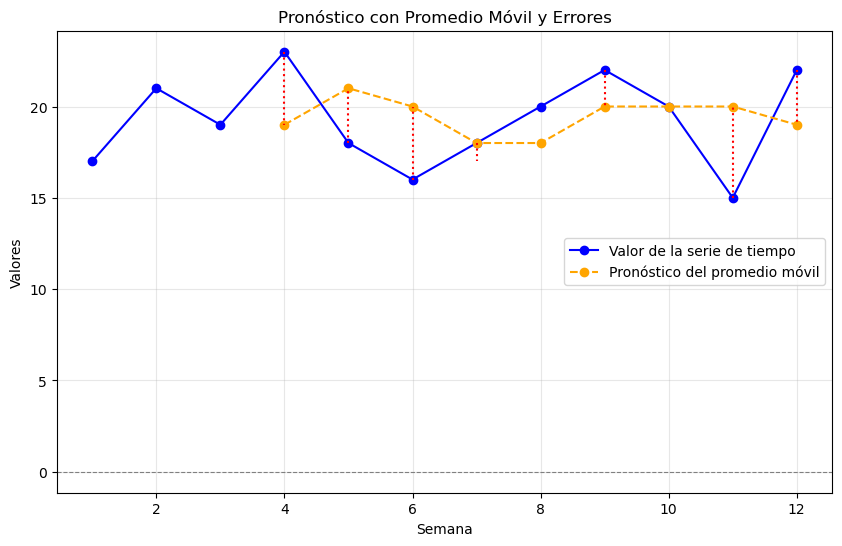

In [1]:
import matplotlib.pyplot as plt

# Datos
semanas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
valores = [17, 21, 19, 23, 18, 16, 18, 20, 22, 20, 15, 22]
pronosticos = [None, None, None, 19, 21, 20, 18, 18, 20, 20, 20, 19]
errores = [None, None, None, 4, -3, -4, 1, 0, 2, 0, -5, 3]

# Gráfico de la serie y pronósticos
plt.figure(figsize=(10, 6))
plt.plot(semanas, valores, marker='o', label="Valor de la serie de tiempo", color="blue")
plt.plot(semanas[3:], pronosticos[3:], marker='o', label="Pronóstico del promedio móvil", color="orange", linestyle="--")

# Añadir errores como barras
for i, (sem, err) in enumerate(zip(semanas, errores)):
    if err is not None:
        plt.vlines(sem, valores[i], valores[i] - err, color="red", linestyle="dotted")

# Personalización
plt.title("Pronóstico con Promedio Móvil y Errores")
plt.xlabel("Semana")
plt.ylabel("Valores")
plt.axhline(0, color='gray', linewidth=0.8, linestyle="--")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Promedios Móviles   Ponderados

En el método de promedios móviles, cada observación en el cálculo recibe el mismo peso.

- Una variación, conocida como promedios móviles ponderados, consiste en seleccionar diferentes pesos para cada valor de datos y luego calcular un
promedio ponderado de los k valores de datos más recientes como el pronóstico.

- En la mayoría de los casos la observación más reciente recibe el mayor peso, y el peso disminuye para los valores de datos más antiguos. Por ejemplo, para la serie de tiempo de las venta de nafta semanal el cálculo de un promedio móvil ponderado de tres
semanas, donde la observación más reciente recibe un peso del triple del peso dado a la observación más antigua y la siguiente
observación más antigua recibe un peso del doble que la observación más antigua.

- Para la semana 4 el cálculo es:

$$\frac{3}{6}\times 19+\frac{2}{6} \times 21+\frac{1}{6} \times 17=19.33$$

En general, si creemos que el pasado reciente es un mejor
pronosticador del futuro que el pasado distante, los pesos más
grandes deben darse a las observaciones más recientes.

## Suavizado exponencial simple

El método  se utiliza cuando no existe una tendencia o estacionalidad discernible en los datos de series temporales. Este método pondera los datos pasados ​​con ponderaciones exponencialmente decrecientes a medida que avanza hacia el pasado; es decir, cuanto más reciente sea el valor de los datos, mayor será su ponderación.

Esta ponderación supera en gran medida las limitaciones de los promedios móviles o los modelos de cambio porcentual. La ponderación utilizada se denomina medida alfa .

### Ecuación del Suavizamiento Exponencial Simple:

$$
F_t = \alpha Y_{t-1} + (1 - \alpha) F_{t-1}
$$

Donde:

- $F_t$ es el pronóstico para el tiempo $t$.
- $\alpha$ (alfa) es el factor de suavizamiento $(0 <  \alpha  < 1)$, que determina cuánto peso se asigna a la observación más reciente.
- $Y_{t-1} $ es el valor real observado en el periodo anterior.
- $ F_{t-1} $ es el pronóstico para el periodo anterior.


La formula muestra que el pronóstico para el periodo $t+1$ es un promedio ponderado del valor
real en el periodo $t$ y el pronóstico para el periodo $t.$


- Es un caso especial del método de promedios móviles ponderados en el cual seleccionamos
sólo un peso, el peso para la observación más reciente.

Los pesos para los demás valores se calculan de forma automática y se vuelven cada vez más
pequeños a medida que las observaciones se alejan en el pasado.


Por ejemplo, para una serie de tiempo que consta de tres períodos de datos: $Y_1$, $Y_2$ y $Y_3$. Comenzamos con:


\begin{align*}
F_1 & = Y_1 \\
F_2 & = \alpha Y_1 + (1 - \alpha) F_1 \\
    & = \alpha Y_1 + (1 - \alpha) Y_1 \\
    & = Y_1
\end{align*}

Para el período 3, el pronóstico es:


Cálculo de $F_3$:

\begin{align*}
F_3 & = \alpha Y_2 + (1 - \alpha) F_2 \\
    & = \alpha Y_2 + (1 - \alpha) Y_1
\end{align*}


Cálculo de $F_4$:

\begin{align*}
F_4 & = \alpha Y_3 + (1 - \alpha) F_3 \\
    & = \alpha Y_3 + (1 - \alpha) \left[ \alpha Y_2 + (1 - \alpha) Y_1 \right] \\
    & = \alpha Y_3 + \alpha (1 - \alpha) Y_2 + (1 - \alpha)^2 Y_1
\end{align*}

Por consiguiente, $F_4$ es un promedio ponderado de los primeros tres valores de la serie de tiempo.



# Constante de Suavización $\alpha = 0.2$



| Semana $t$ | Valor de la serie de tiempo $Y_t$ | Pronóstico de suavización exponencial $F_t$ | Error de pronóstico $Y_t - F_t$ |
|-------------------|-----------------------------------------|--------------------------------------------------|----------------------------------------|
| 1                 | 17                                      | -                                               | -                                      |
| 2                 | 21                                      | 17.00                                           | 4.00                                   |
| 3                 | 19                                      | 17.80                                           | 1.20                                   |
| 4                 | 23                                      | 18.04                                           | 4.96                                   |
| 5                 | 18                                      | 19.03                                           | -1.03                                  |
| 6                 | 16                                      | 18.83                                           | -2.83                                  |
| 7                 | 20                                      | 18.26                                           | 1.74                                   |
| 8                 | 22                                      | 18.61                                           | -0.61                                  |
| 9                 | 20                                      | 18.89                                           | 3.51                                   |
| 10                | 15                                      | 19.19                                           | -4.35                                  |
| 11                | 22                                      | 19.35                                           | 0.81                                   |
| 12                | 22                                      | 18.48                                           | 3.52                                   |


$$
F_{13}=0.2 Y_{12}+0.8 F_{12}=0.2(22)+0.8(18.48)=19.18
$$

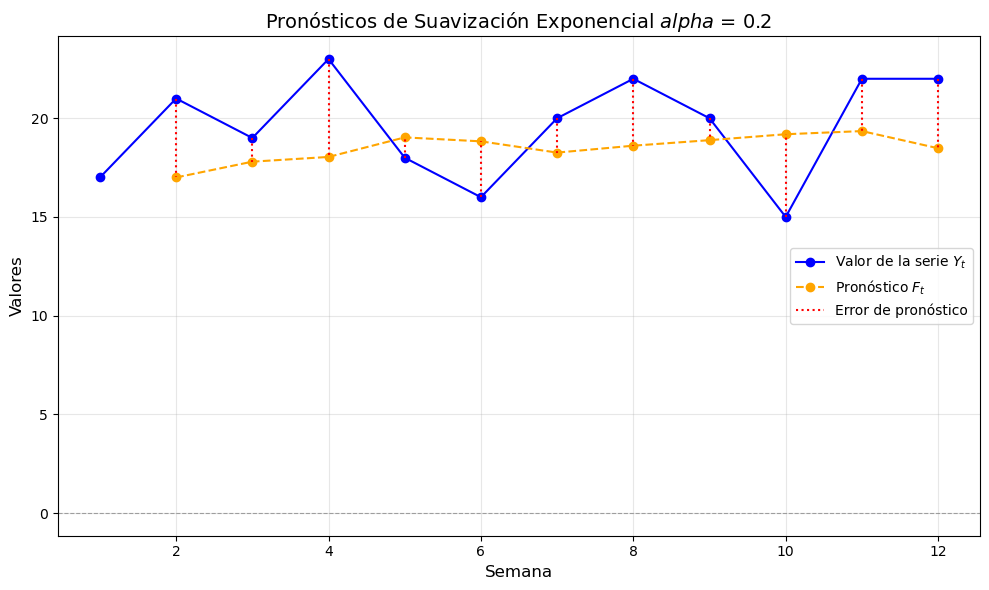

In [2]:
import matplotlib.pyplot as plt

# Datos de la tabla
semanas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
valores_yt = [17, 21, 19, 23, 18, 16, 20, 22, 20, 15, 22, 22]
pronosticos_ft = [None, 17.00, 17.80, 18.04, 19.03, 18.83, 18.26, 18.61, 18.89, 19.19, 19.35, 18.48]
errores = [None, 4.00, 1.20, 4.96, -1.03, -2.83, 1.74, -0.61, 3.51, -4.35, 0.81, 3.52]

# Gráfico de la serie y pronósticos
plt.figure(figsize=(10, 6))

# Serie real
plt.plot(semanas, valores_yt, marker='o', label='Valor de la serie $Y_t$', color='blue')

# Pronósticos
plt.plot(semanas[1:], pronosticos_ft[1:], marker='o', label='Pronóstico $F_t$', color='orange', linestyle='--')

# Errores como barras verticales
for i, (sem, yt, ft) in enumerate(zip(semanas, valores_yt, pronosticos_ft)):
    if ft is not None:
        plt.vlines(sem, yt, ft, color='red', linestyle='dotted', label='Error de pronóstico' if i == 1 else "")

# Personalización del gráfico
plt.title("Pronósticos de Suavización Exponencial $alpha$ = 0.2", fontsize=14)
plt.xlabel("Semana", fontsize=12)
plt.ylabel("Valores", fontsize=12)
plt.axhline(0, color='gray', linewidth=0.8, linestyle="--", alpha=0.7)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### ¿Qué valor de $\alpha$?

• Si la variabilidad aleatoria de la serie de tiempo es considerable, es
preferible un valor pequeño para la constante de suavización. La razón
de esta elección es que, dado que gran parte del error de pronóstico se
debe a la variabilidad aleatoria, no queremos reaccionar de forma
exagerada y ajustar los pronósticos demasiado rápido. Para una serie
de tiempo con relativamente poca variabilidad, los valores más grandes
de la constante de suavización tienen la ventaja de ajustar rápidamente
los pronósticos cuando ocurren errores de pronóstico y por ende
permiten que el pronóstico reaccione más rápido a las condiciones
cambiantes.

• Elegimos el valor de que minimiza el error de pronostico. 

## Suavizado exponencial doble

Se utiliza muestran una tendencia pero no estacionalidad es el método de suavizado exponencial doble. El suavizado exponencial doble aplica el suavizado exponencial simple dos veces, una a los datos originales y luego a los datos resultantes del suavizado exponencial simple.

### Ecuaciones del Suavizamiento Exponencial Doble (Método de Holt):

1. **Ecuación del nivel:**

$$
S_t = \alpha Y_t + (1 - \alpha)(S_{t-1} + T_{t-1})
$$

Donde:
- $S_t$ es el nivel suavizado en el tiempo t.
- $\alpha$ es el parámetro de suavizamiento del nivel.
- $Y_t$ es el valor observado en el tiempo t.
- $T_{t-1}$ es la estimación de la tendencia en el periodo anterior.

2. **Ecuación de la tendencia:**

$$
T_t = \beta(S_t - S_{t-1}) + (1 - \beta)T_{t-1}
$$

Donde:
- $T_t$ es la tendencia suavizada en el tiempo $t$.
- $\beta$ es el parámetro de suavizamiento para la tendencia.
- $S_t$ y $S_{t-1}$ son los niveles suavizados para los periodos $t$ y $t-1$.

3. **Ecuación de pronóstico:**

$$
F_{t+m} = S_t + m \cdot T_t
$$

Donde:
- $F_{t+m}$ es el pronóstico para $m$ periodos en el futuro.
- $S_t$ es el nivel suavizado actual.
- $T_t$ es la tendencia suavizada actual.
- $m$ es el número de periodos a pronosticar hacia adelante.


### Introducción al Suavizamiento Exponencial Triple (Método de Holt-Winters)

El **suavizamiento exponencial triple**, también conocido como el **Método de Holt-Winters**, es una técnica de pronóstico utilizada para series de tiempo que muestran patrones de nivel, tendencia y estacionalidad. Este método aplica tres niveles de suavizamiento: uno para el nivel, otro para la tendencia, y otro para la estacionalidad. Existen dos versiones del modelo de Holt-Winters: una aditiva y una multiplicativa, dependiendo de cómo se ajustan los componentes estacionales.

#### Componentes del modelo:
1. **Nivel (S_t):** Captura el nivel promedio de la serie en un momento dado.
2. **Tendencia (T_t):** Refleja la tasa de cambio del nivel de la serie.
3. **Estacionalidad (I_t):** Captura las fluctuaciones periódicas repetitivas en la serie.

### Ecuaciones del Suavizamiento Exponencial Triple (Holt-Winters)

#### 1. **Ecuación del nivel:**

Para el nivel suavizado en el tiempo t:

**Versión aditiva:**

$$
S_t = \alpha \left( Y_t - I_{t-L} \right) + (1 - \alpha)(S_{t-1} + T_{t-1})
$$

**Versión multiplicativa:**

$$
S_t = \alpha \left( \frac{Y_t}{I_{t-L}} \right) + (1 - \alpha)(S_{t-1} + T_{t-1})
$$

Donde:
- $Y_t$ es el valor observado en el tiempo t.
- $I_{t-L}$ es el componente estacional del mismo período en el ciclo anterior (donde L es la longitud del ciclo estacional).
- $\alpha$ es el factor de suavizamiento para el nivel.

#### 2. **Ecuación de la tendencia:**

Para la tendencia suavizada en el tiempo t:

$$
T_t = \beta(S_t - S_{t-1}) + (1 - \beta)T_{t-1}
$$

Donde:
- $T_t$ es la tendencia suavizada.
- $\beta$ es el factor de suavizamiento para la tendencia.

#### 3. **Ecuación de la estacionalidad:**

Para el componente estacional:

**Versión aditiva:**

$$
I_t = \gamma \left( Y_t - S_t \right) + (1 - \gamma)I_{t-L}
$$

**Versión multiplicativa:**

$$
I_t = \gamma \left( \frac{Y_t}{S_t} \right) + (1 - \gamma)I_{t-L}
$$

Donde:
- $I_t$ es la estacionalidad suavizada en el tiempo t.
- $\gamma$ es el factor de suavizamiento para la estacionalidad.

#### 4. **Ecuación de pronóstico:**

Para el pronóstico m periodos hacia el futuro:

**Versión aditiva:**

$$
F_{t+m} = S_t + m \cdot T_t + I_{t+m-L}
$$

**Versión multiplicativa:**

$$
F_{t+m} = (S_t + m \cdot T_t) \cdot I_{t+m-L}
$$

Donde:
- $F_{t+m}$ es el pronóstico para m periodos en el futuro.
- $I_{t+m-L}$ es el componente estacional para el periodo futuro, ajustado para el ciclo estacional.


El modelo Holt-Winters es útil cuando los datos muestran una tendencia y estacionalidad que deben considerarse al hacer predicciones.



In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [4]:
airline = pd.read_csv("https://raw.githubusercontent.com/Wilsonsr/Series-de-Tiempo/main/Data/airpassengers.csv", parse_dates=True, sep=";")
airline

,Unnamed: 0,x
0,1,112
1,2,118
2,3,132
3,4,129
4,5,121
...,...,...
139,140,606
140,141,508
141,142,461
142,143,390


In [5]:
date_range = pd.date_range(start="1949-01", end="1961-01", freq='ME')
date_range

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='ME')

In [6]:
airline.index=date_range

In [7]:
airline

,Unnamed: 0,x
1949-01-31,1,112
1949-02-28,2,118
1949-03-31,3,132
1949-04-30,4,129
1949-05-31,5,121
...,...,...
1960-08-31,140,606
1960-09-30,141,508
1960-10-31,142,461
1960-11-30,143,390


In [8]:
airline.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
airline.rename(columns={"x": "Cantidad de pasajeros"}, inplace=True)

In [9]:
airline

,Cantidad de pasajeros
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [10]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-31 to 1960-12-31
Freq: ME
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Cantidad de pasajeros  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [11]:
airline

,Cantidad de pasajeros
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121
...,...
1960-08-31,606
1960-09-30,508
1960-10-31,461
1960-11-30,390


In [12]:
import seaborn as sns
sns.set_theme()

<Axes: title={'center': 'Cantidad de Pasajeros'}>

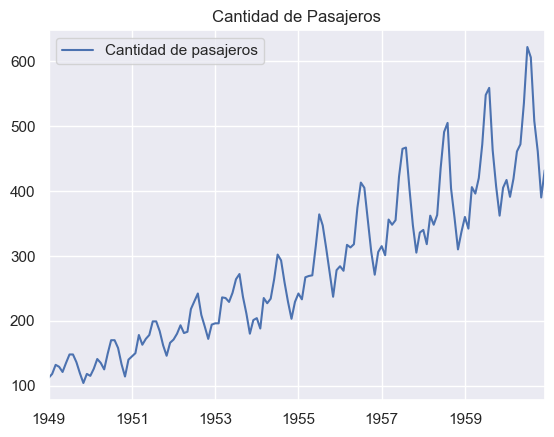

In [13]:
airline[['Cantidad de pasajeros']].plot(title='Cantidad de Pasajeros')

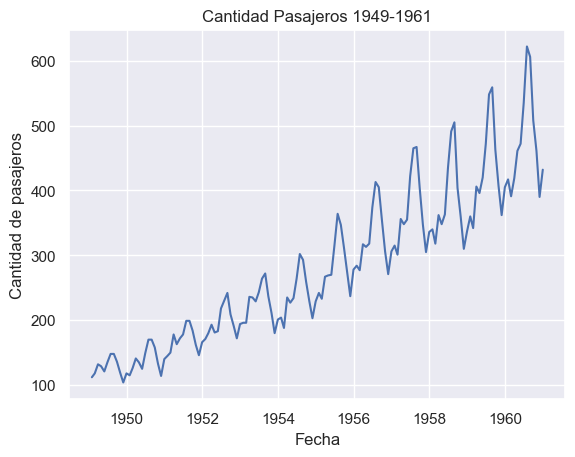

In [14]:
import seaborn as sns
sns.lineplot(data=airline, x=airline.index, y='Cantidad de pasajeros')
plt.title("Cantidad Pasajeros 1949-1961")
plt.xlabel("Fecha")
plt.show()


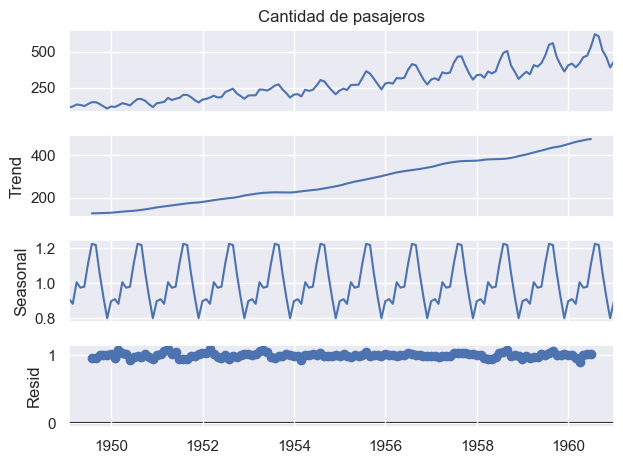

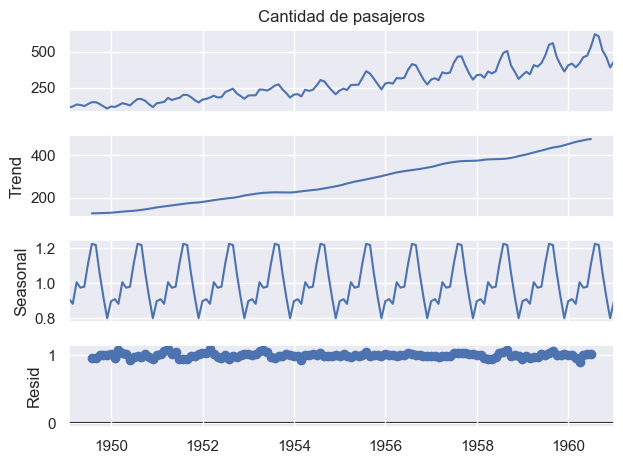

In [15]:
decompose_result = seasonal_decompose(airline["Cantidad de pasajeros"],model="multiplicative")
decompose_result.plot()

Ajuste de los datos con suavizado exponencial de Holt-Winters
Ahora ajustaremos estos datos al suavizado exponencial simple, doble y triple respectivamente, y veremos cómo funciona.

Antes de comenzar con los modelos, primero definiremos el coeficiente de peso Alfa y el Período de Tiempo. También configuramos la frecuencia DateTime a un nivel mensual.

In [ ]:
alpha=1/24

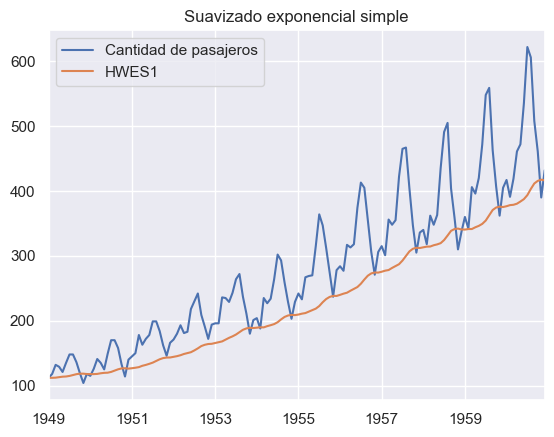

In [17]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

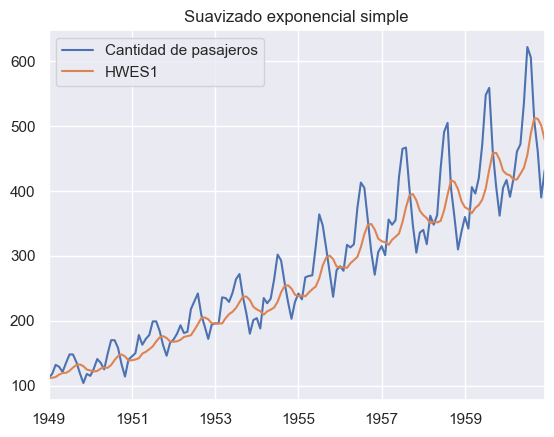

In [18]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(smoothing_level=0.2,optimized=False,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

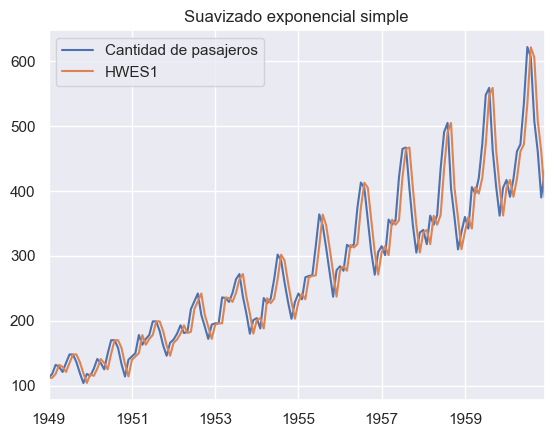

In [19]:
airline["HWES1"] = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(optimized=True,use_brute=True).fittedvalues
airline[["Cantidad de pasajeros","HWES1"]].plot(title="Suavizado exponencial simple");

In [20]:
# Ajustar el modelo
model = SimpleExpSmoothing(airline["Cantidad de pasajeros"]).fit(optimized=True, use_brute=True)

# Obtener el valor de alpha (parámetro de suavizamiento)
alpha = model.model.params['smoothing_level']

# Mostrar el valor de alpha
print(f"El valor de alfa es: {alpha}")

El valor de alfa es: 0.995


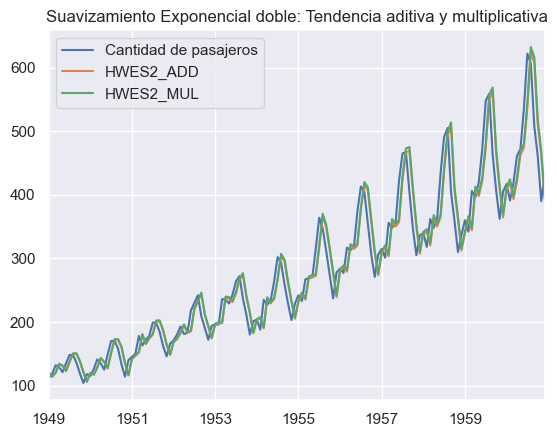

In [21]:
airline["HWES2_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add").fit().fittedvalues
airline["HWES2_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul").fit().fittedvalues
airline[["Cantidad de pasajeros","HWES2_ADD","HWES2_MUL"]].plot(title="Suavizamiento Exponencial doble: Tendencia aditiva y multiplicativa");

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


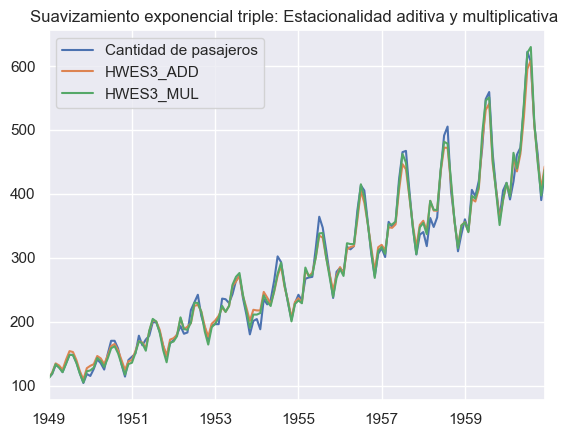

In [22]:
#Triple HWES
airline["HWES3_ADD"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
airline["HWES3_MUL"] = ExponentialSmoothing(airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
airline[["Cantidad de pasajeros","HWES3_ADD","HWES3_MUL"]].plot(title="Suavizamiento exponencial triple: Estacionalidad aditiva y multiplicativa ");

In [23]:
# Split into train and test set
train_airline = airline[:120]
test_airline = airline[120:]

In [24]:
train_airline

,Cantidad de pasajeros,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
1949-01-31,112,112.000000,120.527273,120.527273,111.964032,111.595184
1949-02-28,118,112.000000,114.102394,113.990701,120.194303,118.842728
1949-03-31,132,117.970000,120.040657,120.031669,134.685413,133.334004
1949-04-30,129,131.929850,134.001539,134.235979,131.401806,127.899733
1949-05-31,121,129.014649,131.085845,131.270786,124.641036,120.978387
...,...,...,...,...,...,...
1958-08-31,505,490.718198,492.802728,499.294645,471.615109,478.253935
1958-09-30,404,504.928591,507.014362,513.757885,414.731028,420.116343
1958-10-31,359,404.504643,406.580170,411.579115,355.899092,357.453638
1958-11-30,310,359.227523,361.298265,365.501589,317.607335,314.784851


In [25]:
test_airline

,Cantidad de pasajeros,HWES1,HWES2_ADD,HWES2_MUL,HWES3_ADD,HWES3_MUL
1959-01-31,360,336.866231,338.934275,342.740670,355.593981,355.105777
1959-02-28,342,359.884331,361.954484,366.162463,340.724140,339.828696
1959-03-31,406,342.089422,344.157599,348.058370,391.788162,396.568913
1959-04-30,396,405.680447,407.754768,412.758291,387.844495,392.257736
1959-05-31,420,396.048402,398.121584,402.962931,407.527918,411.111116
1959-06-30,472,419.880242,421.955595,427.209646,482.298241,494.682616
1959-07-31,548,471.739401,473.819745,479.976829,530.934576,545.696896
1959-08-31,559,547.618697,549.706446,557.187594,540.812923,550.596203
1959-09-30,463,558.943093,561.031805,568.715959,447.116494,453.206373
1959-10-31,407,463.479715,465.558677,471.584076,405.344874,402.161159


c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


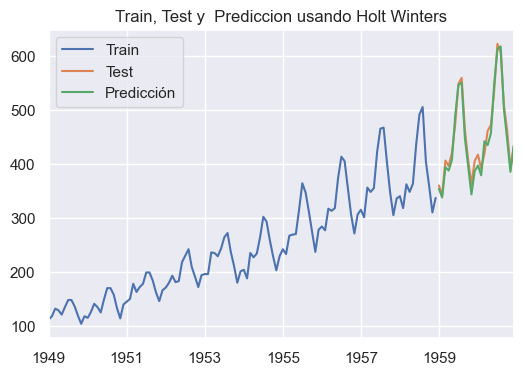

In [26]:
fitted_model = ExponentialSmoothing(train_airline["Cantidad de pasajeros"],trend="mul",seasonal="mul",seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(24)
train_airline["Cantidad de pasajeros"].plot(legend=True,label="Train")
test_airline["Cantidad de pasajeros"].plot(legend=True,label="Test",figsize=(6,4))
test_predictions.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

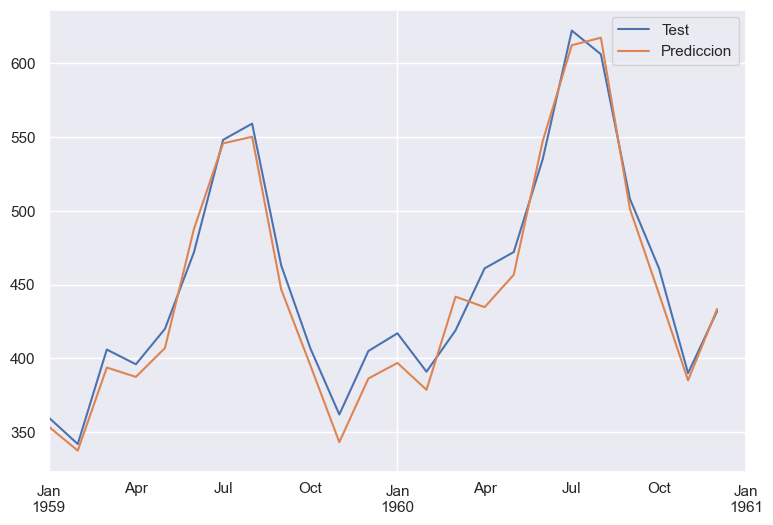

In [27]:
test_airline["Cantidad de pasajeros"].plot(legend=True,label="Test",figsize=(9,6))
test_predictions.plot(legend=True,label="Prediccion",xlim=["1959-01-01","1961-01-01"]);

In [28]:
test_predictions

1959-01-31    353.807513
1959-02-28    337.555864
1959-03-31    393.806400
1959-04-30    387.476671
1959-05-31    407.014077
1959-06-30    487.824556
1959-07-31    545.611041
1959-08-31    550.129056
1959-09-30    446.734885
1959-10-31    395.510993
1959-11-30    343.290040
1959-12-31    386.375565
1960-01-31    396.934254
1960-02-29    378.701639
1960-03-31    441.808735
1960-04-30    434.707455
1960-05-31    456.626338
1960-06-30    547.287068
1960-07-31    612.117335
1960-08-31    617.186065
1960-09-30    501.188844
1960-10-31    443.721106
1960-11-30    385.134773
1960-12-31    433.472131
Freq: ME, dtype: float64

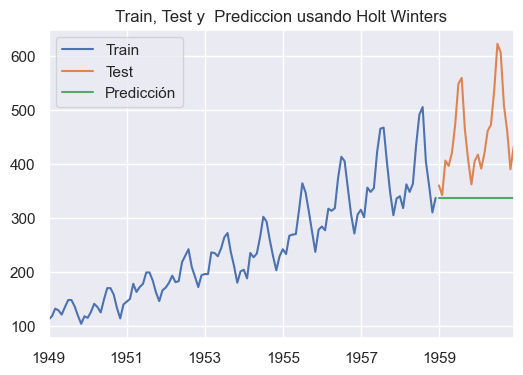

In [29]:
fitted_model_1 = SimpleExpSmoothing(train_airline["Cantidad de pasajeros"]).fit(optimized=True )
test_predictions_1 = fitted_model_1.forecast(24)
train_airline["Cantidad de pasajeros"].plot(legend=True,label="Train")
test_airline["Cantidad de pasajeros"].plot(legend=True,label="Test",figsize=(6,4))
test_predictions_1.plot(legend=True,label="Predicción")
plt.title("Train, Test y  Prediccion usando Holt Winters");

### 1. MAE (Mean Absolute Error)
$$
MAE = \frac{1}{n} \sum_{t=1}^{n} |Y_t - \hat{Y}_t|
$$
Donde:
-  $Y_t$ es el valor real en el tiempo $ t $.
-  $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.

### 2. MSE (Mean Squared Error)
$$
MSE = \frac{1}{n} \sum_{t=1}^{n} (Y_t - \hat{Y}_t)^2
$$
Donde:
- $Y_t$ es el valor real en el tiempo $t$.
- $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.

### 3. RMSE (Root Mean Squared Error)
$$
RMSE = \sqrt{\frac{1}{n} \sum_{t=1}^{n} (Y_t - \hat{Y}_t)^2}
$$
Donde:
- $Y_t$ es el valor real en el tiempo $t$.
- $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.

### 4. MAPE (Mean Absolute Percentage Error)
$$
MAPE = \frac{100}{n} \sum_{t=1}^{n} \left| \frac{Y_t - \hat{Y}_t}{Y_t} \right|
$$
Donde:
- $Y_t$ es el valor real en el tiempo \( t \).
-  $\hat{Y}_t$ es el valor pronosticado en el tiempo $t$.
- $n$ es el número total de observaciones.


In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, mean_absolute_percentage_error
mae=mean_absolute_error(test_airline["Cantidad de pasajeros"],test_predictions)
print(f'MAE {mae:.2f}')
print(f"MSE: {mean_squared_error(test_airline["Cantidad de pasajeros"],test_predictions):.2f}")
print(f"RMSE: {root_mean_squared_error(test_airline['Cantidad de pasajeros'],test_predictions):.2f}")
print(f"MAPE: {mean_absolute_percentage_error(test_airline["Cantidad de pasajeros"], test_predictions)*100:.2f}%")

MAE 12.38
MSE: 192.61
RMSE: 13.88
MAPE: 2.81%


In [31]:
gas=pd.read_csv("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/gas.csv", sep=";")
gas

,Unnamed: 0,x
0,1,1709
1,2,1646
2,3,1794
3,4,1878
4,5,2173
...,...,...
471,472,49013
472,473,56624
473,474,61739
474,475,66600


In [32]:
fecha=pd.date_range(start="1956-01", end="1995-09", freq="ME")
fecha

DatetimeIndex(['1956-01-31', '1956-02-29', '1956-03-31', '1956-04-30',
               '1956-05-31', '1956-06-30', '1956-07-31', '1956-08-31',
               '1956-09-30', '1956-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=476, freq='ME')

In [33]:
gas.index=fecha

In [34]:
gas

,Unnamed: 0,x
1956-01-31,1,1709
1956-02-29,2,1646
1956-03-31,3,1794
1956-04-30,4,1878
1956-05-31,5,2173
...,...,...
1995-04-30,472,49013
1995-05-31,473,56624
1995-06-30,474,61739
1995-07-31,475,66600


In [35]:
gas.drop("Unnamed: 0", axis=1, inplace=True)

In [36]:
gas.rename(columns={"x":"Produccion"}, inplace=True)

In [37]:
gas

,Produccion
1956-01-31,1709
1956-02-29,1646
1956-03-31,1794
1956-04-30,1878
1956-05-31,2173
...,...
1995-04-30,49013
1995-05-31,56624
1995-06-30,61739
1995-07-31,66600


<Axes: >

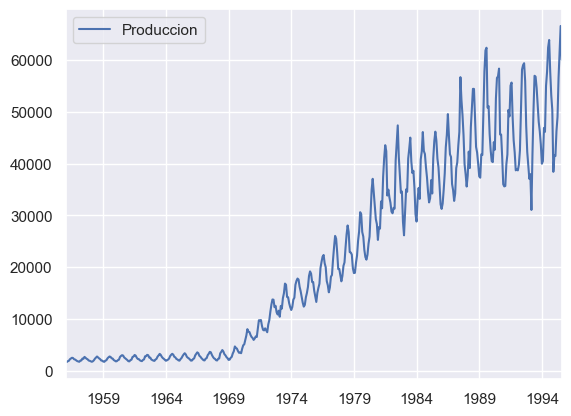

In [38]:
gas.plot()

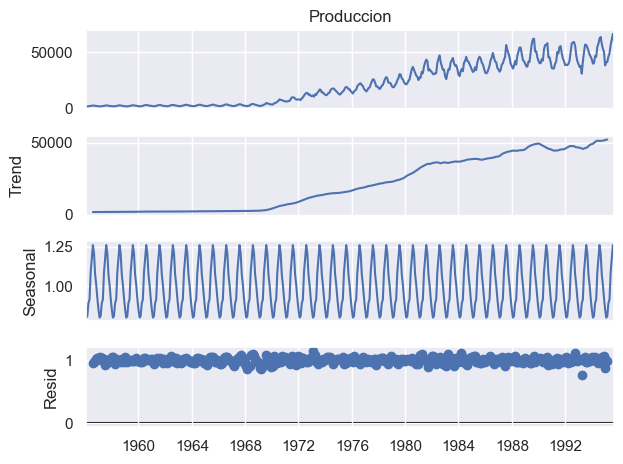

In [39]:
# Descomposición de la serie de tiempo gas
decompose_result_gas = seasonal_decompose(gas["Produccion"], model="multiplicative")

# Graficar los resultados de la descomposición
decompose_result_gas.plot()
plt.show()

In [40]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Descomposición de la serie de tiempo airline
decompose_result = seasonal_decompose(airline["Cantidad de pasajeros"], model="multiplicative")

# Crear un DataFrame con los resultados de la descomposición
decomposition_df = pd.DataFrame({
    'Fecha': airline.index,
    'Observado': decompose_result.observed,
    'Tendencia': decompose_result.trend,
    'Estacional': decompose_result.seasonal,
    'Residuo': decompose_result.resid
})

# Crear gráficos interactivos
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=['Observado', 'Tendencia', 'Estacional', 'Residuo'])

fig.add_trace(go.Scatter(x=decomposition_df['Fecha'], y=decomposition_df['Observado'], mode='lines', name='Observado'), row=1, col=1)
fig.add_trace(go.Scatter(x=decomposition_df['Fecha'], y=decomposition_df['Tendencia'], mode='lines', name='Tendencia'), row=2, col=1)
fig.add_trace(go.Scatter(x=decomposition_df['Fecha'], y=decomposition_df['Estacional'], mode='lines', name='Estacional'), row=3, col=1)
fig.add_trace(go.Scatter(x=decomposition_df['Fecha'], y=decomposition_df['Residuo'], mode='lines', name='Residuo'), row=4, col=1)

fig.update_layout(height=800, title_text="Descomposición de la Serie de Tiempo (Airline)")
fig.show()

```mermaid
flowchart TD
    A[Serie temporal (datos)] --> B{¿Es estacionaria la serie?}
    B -->|No| C[Transformación de la serie]
    C --> B
    B -->|Sí| D[Determinación de p, q, P y Q]
    D --> E[Estimación de los parámetros del modelo]
    E --> F{¿Es el modelo adecuado?}
    F -->|No| D
    F -->|Sí| G[Obtención de las predicciones]
    G --> H{¿El modelo predice de forma satisfactoria?}
    H -->|No| D
    H -->|Sí| I[Fin]


In [41]:
cafe=pd.read_excel("https://github.com/Wilsonsr/Series-de-Tiempo/raw/main/Data/cafe.xlsx")
cafe

,fecha,Toneladas
0,2000-01-01,658.000000
1,2000-02-01,740.000000
2,2000-03-01,592.000000
3,2000-04-01,1055.000000
4,2000-05-01,1114.000000
...,...,...
290,2024-03-01,865.532563
291,2024-04-01,742.000000
292,2024-05-01,1120.000000
293,2024-06-01,1172.000000


In [42]:
cafe.set_index('fecha', inplace=True)

In [43]:
cafe

,Toneladas
fecha,
2000-01-01,658.000000
2000-02-01,740.000000
2000-03-01,592.000000
2000-04-01,1055.000000
2000-05-01,1114.000000
...,...
2024-03-01,865.532563
2024-04-01,742.000000
2024-05-01,1120.000000


<Axes: xlabel='fecha'>

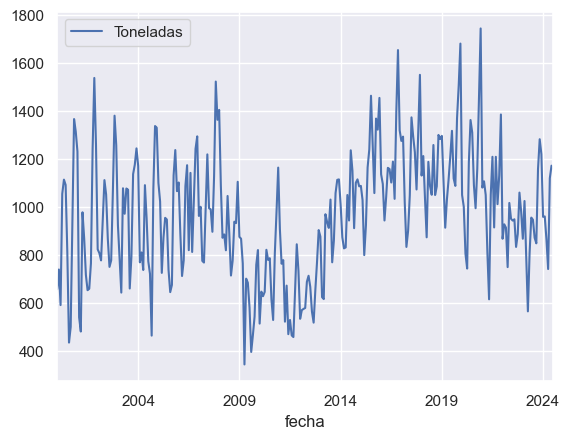

In [44]:
cafe.plot()

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning:

overflow encountered in matmul



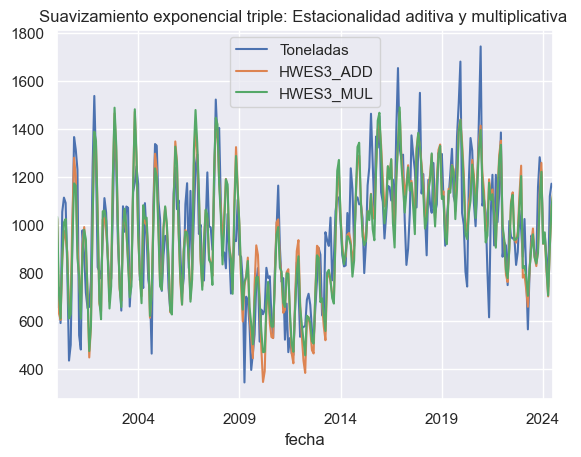

In [45]:
#Triple HWES
cafe["HWES3_ADD"] = ExponentialSmoothing(cafe["Toneladas"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
cafe["HWES3_MUL"] = ExponentialSmoothing(cafe["Toneladas"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
cafe[["Toneladas","HWES3_ADD","HWES3_MUL"]].plot(title="Suavizamiento exponencial triple: Estacionalidad aditiva y multiplicativa ");

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning:

overflow encountered in matmul



Pronóstico con estacionalidad aditiva:
2024-08-01    1045.532694
2024-09-01    1013.036860
2024-10-01    1135.377252
2024-11-01    1290.548065
2024-12-01    1344.036876
2025-01-01    1034.086569
Freq: MS, dtype: float64

Pronóstico con estacionalidad multiplicativa:
2024-08-01    1032.417806
2024-09-01    1001.493063
2024-10-01    1129.978882
2024-11-01    1274.585359
2024-12-01    1310.777467
2025-01-01    1000.372655
Freq: MS, dtype: float64


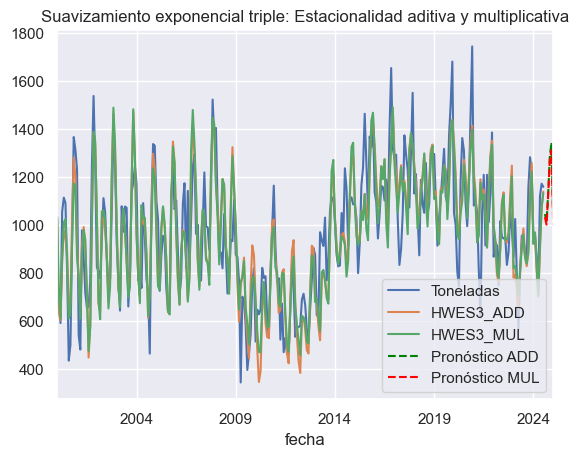

In [46]:
# Ajustar el modelo con estacionalidad aditiva
model_add = ExponentialSmoothing(cafe["Toneladas"], trend="add", seasonal="add", seasonal_periods=12).fit()

# Ajustar el modelo con estacionalidad multiplicativa
model_mul = ExponentialSmoothing(cafe["Toneladas"], trend="mul", seasonal="mul", seasonal_periods=12).fit()

# Pronóstico de 6 meses
forecast_add = model_add.forecast(6)
forecast_mul = model_mul.forecast(6)

# Mostrar los pronósticos
print("Pronóstico con estacionalidad aditiva:")
print(forecast_add)
print("\nPronóstico con estacionalidad multiplicativa:")
print(forecast_mul)

# Graficar los resultados
cafe[["Toneladas", "HWES3_ADD", "HWES3_MUL"]].plot(title="Suavizamiento exponencial triple: Estacionalidad aditiva y multiplicativa")
forecast_add.plot(label='Pronóstico ADD', linestyle='--', color='green')
forecast_mul.plot(label='Pronóstico MUL', linestyle='--', color='red')
plt.legend()
plt.show()

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\wsand\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning:

overflow encountered in matmul



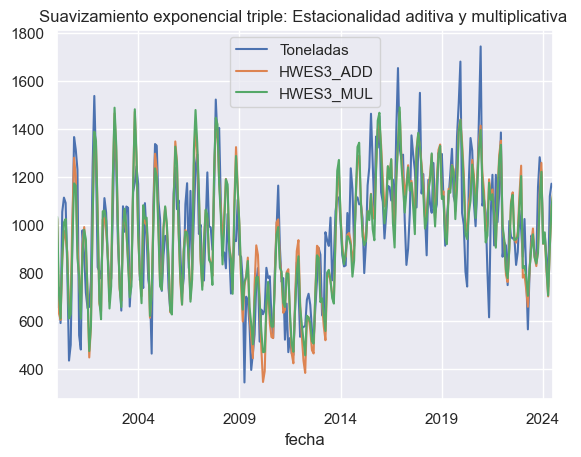

In [47]:
#Triple HWES
cafe["HWES3_ADD"] = ExponentialSmoothing(cafe["Toneladas"],trend="add",seasonal="add",seasonal_periods=12).fit().fittedvalues
cafe["HWES3_MUL"] = ExponentialSmoothing(cafe["Toneladas"],trend="mul",seasonal="mul",seasonal_periods=12).fit().fittedvalues
cafe[["Toneladas","HWES3_ADD","HWES3_MUL"]].plot(title="Suavizamiento exponencial triple: Estacionalidad aditiva y multiplicativa ");